![](../assets/workshop-banner.png)

# Introduction to computer vision with python
> This workshop introduces several computer vision fundamentals.

The notebook source is locaed at : [insert link here]()

Some resources you might find helpful:
- [Intro to colab](https://colab.research.google.com/notebooks/welcome.ipynb)
- [Intro to python](https://github.com/RohanGautam/intro-to-python-workshop)

## Libraries we'll be using 
- [Numpy](https://github.com/numpy/numpy) has powerful multidimensional arrays, and is a fundamental package for scientific computing with python.
- [Matplotlib](https://github.com/matplotlib/matplotlib) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [OpenCv](https://docs.opencv.org/4.5.2/d6/d00/tutorial_py_root.html) is a open source compter vision library in python.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from skimage import io

## Loading, Displaying and Saving

Let's load some images! Here, we'll be loading(downloading) images from URLs. We could have also read the images locally from our filesystem.


In [2]:
puppy_url = r"https://media.4-paws.org/1/e/d/6/1ed6da75afe37d82757142dc7c6633a532f53a7d/VIER%20PFOTEN_2019-03-15_001-2886x1999-1920x1330.jpg"
image_rgb = io.imread(puppy_url) # could have also been a path to an image in your filesystem

# for historical reasons, opencv uses BGR for everything, so we have to convert it
image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

In [3]:
def show_cv_image(image):
    """This is a utility function to show an opencv image in  jupyter notebook.
    On your system, you can use the `cv2.imshow` method. Here, we show the BGR image as RGB and vice versa,
    so that we can always see opencv's version of the image correctly!"""
    # convert BGR to RGB then show ( reorder image channels)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

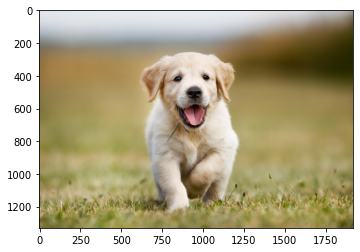

In [4]:
show_cv_image(image)

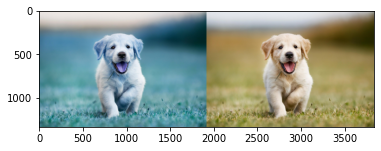

In [5]:
show_cv_image(cv2.hconcat((image_rgb, image)))

In [6]:
cv2.imwrite("puppy.jpg", image)

True

In [7]:
# EXERCISE
# Find an image on google images, and get it's URL by Right-clicking>copy image address(chrome)/copy image link(firefox)
# Load it up in this cell, convert the image to opencv's BGR format, and show it using the `show_cv_image` 
# convinience function!
# assign it to the variable name `my_image`. We'll use it in further exercises below!

## Image basics

### Pixels
An image is a set of pixels. It doesn't get finer-grained than that. You can think of an image as a grid of pixels.

Most pixels are represented in two ways :
- Color : In the RGB color space, each pixel consists of 3 numbers - one for red, green, and blue respectively. Each of them go between 0 and 255.
- Grayscale : In a grayscale image, each pixel is represented by one number between 0 and 255. 0 for black, 255 for white.

Some examples of a single pixel color in the RGB color space:
- (255,255,255) : We fill up all the buckets for white
- (0,0,0) : Empty the buckets for black
- (255,0,0): Fill up only the red bucket for pure red

Start to see the pattern? We get all the colors by tweaking the RGB values.

---
> RGB is the most common color space. Why does opencv use BGR? This is because of legacy reasons. Really old film cameras used BGR, so that's how opencv started using it. But when convention changed, changing the default color space would break a lot of programs for people already using opencv. So BGR stuck 🤷

In [8]:
image

array([[[233, 228, 225],
        [233, 228, 225],
        [233, 228, 225],
        ...,
        [155, 159, 160],
        [154, 158, 159],
        [154, 158, 159]],

       [[233, 228, 225],
        [233, 228, 225],
        [233, 228, 225],
        ...,
        [154, 158, 159],
        [154, 158, 159],
        [154, 158, 159]],

       [[233, 228, 225],
        [233, 228, 225],
        [233, 228, 225],
        ...,
        [153, 157, 158],
        [153, 157, 158],
        [153, 157, 158]],

       ...,

       [[ 57, 114, 123],
        [ 58, 115, 124],
        [ 57, 116, 125],
        ...,
        [ 39,  91,  97],
        [ 40,  92,  98],
        [ 40,  92,  98]],

       [[ 61, 119, 125],
        [ 61, 119, 125],
        [ 61, 119, 125],
        ...,
        [ 41,  91,  97],
        [ 41,  91,  97],
        [ 42,  92,  98]],

       [[ 61, 119, 125],
        [ 61, 119, 125],
        [ 61, 119, 125],
        ...,
        [ 41,  91,  97],
        [ 41,  91,  97],
        [ 42,  92,  98]]

In [9]:
# image is a `numpy` array. the array thus has properties such as "shape" which we can access.
print(image.shape)
print(f"Width: {image.shape[1]}px")
print(f"Height: {image.shape[0]}px")
print(f"Channels: {image.shape[2]}")

(1330, 1920, 3)
Width: 1920px
Height: 1330px
Channels: 3


### The image coordinate system
Understanding the image coordinate system is fundamental to how we will access pixels. It begins at the top-left corner, and increased downwards.

Note that it begins with zero, as python is zero indexed! so an 8x8 grid like the one below, goes from (0,0) as the top-left corner and (7,7) and the bottom-right corner.
![](../assets/image-coord-system.png)


In [10]:
image[0,0] # note that this is in BGR!

array([233, 228, 225], dtype=uint8)

### Cropping and Drawing on images

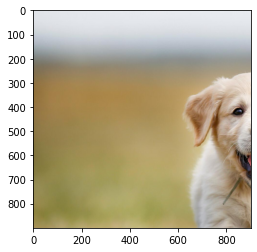

In [11]:
# crop the image to 100px by 100px starting from the top-right by "slicing the array"
# start_y, end_y, start_x, end_x
show_cv_image(image[0:900, 0:900])

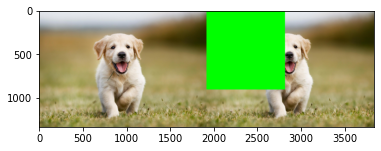

In [12]:
from copy import deepcopy as copy
img_copy = copy(image)

# directly modifying pixels of `img_copy`
img_copy[0:900, 0:900] = (0,255,0) #(blue, GREEN, red)

# "horizontally concatenate" the original and modified image to show the change
show_cv_image(cv2.hconcat((image, img_copy)))


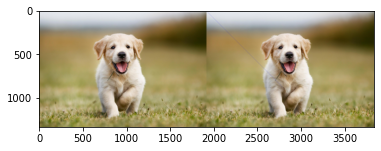

In [13]:
# making a diagonal on an image
diagonal_len = 900
img_copy = copy(image)
for i in range(diagonal_len):
    img_copy[i,i] = (255,0,0)
show_cv_image(cv2.hconcat((image, img_copy)))
    

OpenCV also has drawing utilities if we want to draw other basic shapes, lines, etc. 

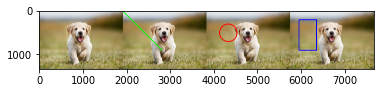

In [14]:
img_line = copy(image)
img_circle = copy(image)
img_rectangle = copy(image)

green = (0,255,0)
blue = (255,0,0)
red = (0,0,255)

cv2.line(img_line, (0,0), (900,900), green, 20)
cv2.rectangle(img_rectangle, (200,200), (600,900), blue, 20)
cv2.circle(img_circle, (500,500), 200, red, 20)

show_cv_image(cv2.hconcat((image, img_line, img_circle, img_rectangle)))

We should be proud, we just learnt how to access and manipulate pixels to our liking! Let's do an exercise before we carry on.

In [15]:
# EXERCISE
# In our first exercise, you downloaded and displayed your own image, called `my_image`. This is where we use it!
# 1. Print the pixel at index [0,0].
# 2. Draw a circle anywhere on your image using the opencv utility!

_SELF EXPLORATION_: Challenge yourself with this problem! Add some cells below and get to making some \~art\~.
In the picture below, The following is randomly generated
- The center of the circle
- The radius of the circle
- The color of the circle (a random number between 0-255 for B, G and R each)

This gives you a unique piece of art every time you run your code!

Hint: Python as a built-in module called `random` which is used to generate random numbers. `random.randint` might be a useful function to check out.

Hint: You can create a blank canvas of size 300x300 like so : `canvas = np.zeros((300, 300, 3), dtype = "uint8")`. Execute and play with it to see how the array is created! Don't hesitate to google if you're confused. Googling is a big part on learning how to program.
![](../assets/art-circles.png)

## Image processing
We’ll start off with basic image transformations. Then, we’ll explore other types of image processing techniques, including image arithmetic, bitwise operations, and masking.

### Image Transformations
We'll take a look at basic image transformation like translating, rotation, and so on.

#### Translation
The shifting of an image along the `x` and `y` axis.

We use [Affine transformations](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html) to carry out these transformations. An Affine transformation is a transformation of the image that preserves lines and parallelism (but not necessarily distances and angles). 

![](../assets/affine_matrix.png)

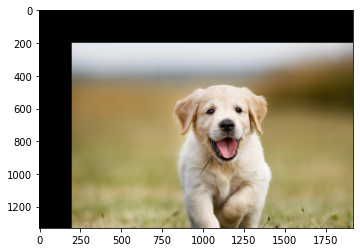

In [22]:
x = 200
y = 200

h = image.shape[0]
w = image.shape[1]

# Embedded in the matrix below is a 2x2 identity matrix (`A`, the image isn't changed) and a 2x1 `b` matrix
# which is the part which is added to every pixel.
matrix = np.float32([
    [1, 0, x],
    [0, 1, y]
])

# pass the image, matrix, and the (width,height)
shifted = cv2.warpAffine(image, matrix, (w,h))
show_cv_image(shifted)

In [17]:
# install libraries for interactivity via command line
# ! pip install mpl_interactions ipympl

In [18]:
# interactive visualisation
# %matplotlib ipympl
# %matplotlib inline
# import mpl_interactions.ipyplot as iplt

# def translate(x,y):
#     matrix = np.float32([
#         [1, 0, x],
#         [0, 1, y]
#     ])
#     # pass the image, matrix, and the (width,height)
#     shifted = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))
#     img_rgb = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)
#     return img_rgb

# fig, ax = plt.subplots()
# controls = iplt.imshow(translate, x=(-500,500), y=(-500, 500))


In [19]:
# fig, ax = plt.subplots()
# %matplotlib inline
# iplt.imshow(image)

In [20]:
# %matplotlib widget
# import ipywidgets as widgets
# def translate(x,y):
#     matrix = np.float32([
#         [1, 0, x],
#         [0, 1, y]
#     ])
#     # pass the image, matrix, and the (width,height)
#     shifted = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))
#     img_rgb = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)
#     return img_rgb



# plt.ioff()
# fig = plt.figure()
# plt.ion()
# im = plt.imshow(translate(0,0))
# def update(change):
#     print(change['new'])
#     im.set_data(translate(change['new'],0))
#     fig.canvas.draw_idle()

# slider = widgets.IntSlider(value=0, min=-500, max=500)
# slider.observe(update, names='value')
# widgets.VBox([slider, widgets.Image(value=fig.canvas.)])
# # slider

In [21]:
# Exercise: experiment with negative x and y values in the transform matrix above and see what happens!

### Rotation

It is what it is.

Rotate an image about a point by an angle.

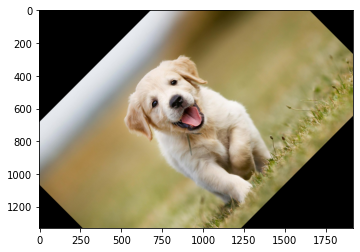

In [25]:
h = image.shape[0]
w = image.shape[1]

center = (w//2, h//2)
# can also specify the scale of an image. Note that we don't have to manually define the matrix
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1)
rotated = cv2.warpAffine(image, rotation_matrix, (w,h))
show_cv_image(rotated)

In [ ]:
# EXERCISE: Rotate your image (`my_image`) by 75 degrees